Read csv file of all alloys

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
data = pd.read_csv("SteelDB2.csv")
data.head

<bound method NDFrame.head of      Weld      C    Mn    Si      S      P      Al      Ti    Cr    Ni     Mo  \
0    A3Ni  0.062  0.62  0.29  0.007  0.007  0.0005  0.0006  0.03  3.01  0.005   
1    A3Ni  0.057  0.65  0.30  0.007  0.007  0.0005  0.0036  0.03  3.03  0.005   
2    A3Ni  0.059  0.63  0.31  0.007  0.007  0.0005  0.0082  0.03  3.00  0.005   
3    A3Ni  0.065  0.65  0.35  0.007  0.006  0.0005  0.0150  0.03  3.00  0.005   
4    A3Ni  0.069  0.67  0.39  0.006  0.011  0.0005  0.0220  0.03  2.96  0.005   
..    ...    ...   ...   ...    ...    ...     ...     ...   ...   ...    ...   
958    Ti  0.075  1.75  0.29  0.006  0.005  0.0005  0.0255  0.03  0.03  0.005   
959    Zn  0.069  1.45  0.27  0.010  0.010  0.0006  0.0029  0.03  0.03  0.005   
960    Zn  0.076  1.48  0.31  0.010  0.010  0.0005  0.0027  0.03  0.03  0.005   
961    Zn  0.077  1.43  0.26  0.010  0.010  0.0005  0.0027  0.03  0.03  0.005   
962    Zn  0.076  1.39  0.26  0.010  0.010  0.0005  0.0025  0.03  0.03  0.005  

Drop NA values from Yield strength if they are present

In [2]:
YSdata = data.dropna(axis=0,subset=['YS'])
YSdata["YS"]

0      457
1      477
2      489
3      490
4      533
      ... 
958    588
959    476
960    497
961    483
962    468
Name: YS, Length: 963, dtype: int64

In [3]:
YSdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 963 entries, 0 to 962
Data columns (total 19 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Weld    963 non-null    object 
 1   C       963 non-null    float64
 2   Mn      963 non-null    float64
 3   Si      963 non-null    float64
 4   S       963 non-null    float64
 5   P       963 non-null    float64
 6   Al      963 non-null    float64
 7   Ti      963 non-null    float64
 8   Cr      963 non-null    float64
 9   Ni      963 non-null    float64
 10  Mo      963 non-null    float64
 11  V       963 non-null    float64
 12  Cu      963 non-null    float64
 13  YS      963 non-null    int64  
 14  UTS     963 non-null    int64  
 15  El      961 non-null    object 
 16  RA      962 non-null    float64
 17  Temp    947 non-null    float64
 18  Temp.1  963 non-null    int64  
dtypes: float64(14), int64(3), object(2)
memory usage: 143.1+ KB


Get some information on data like correlations

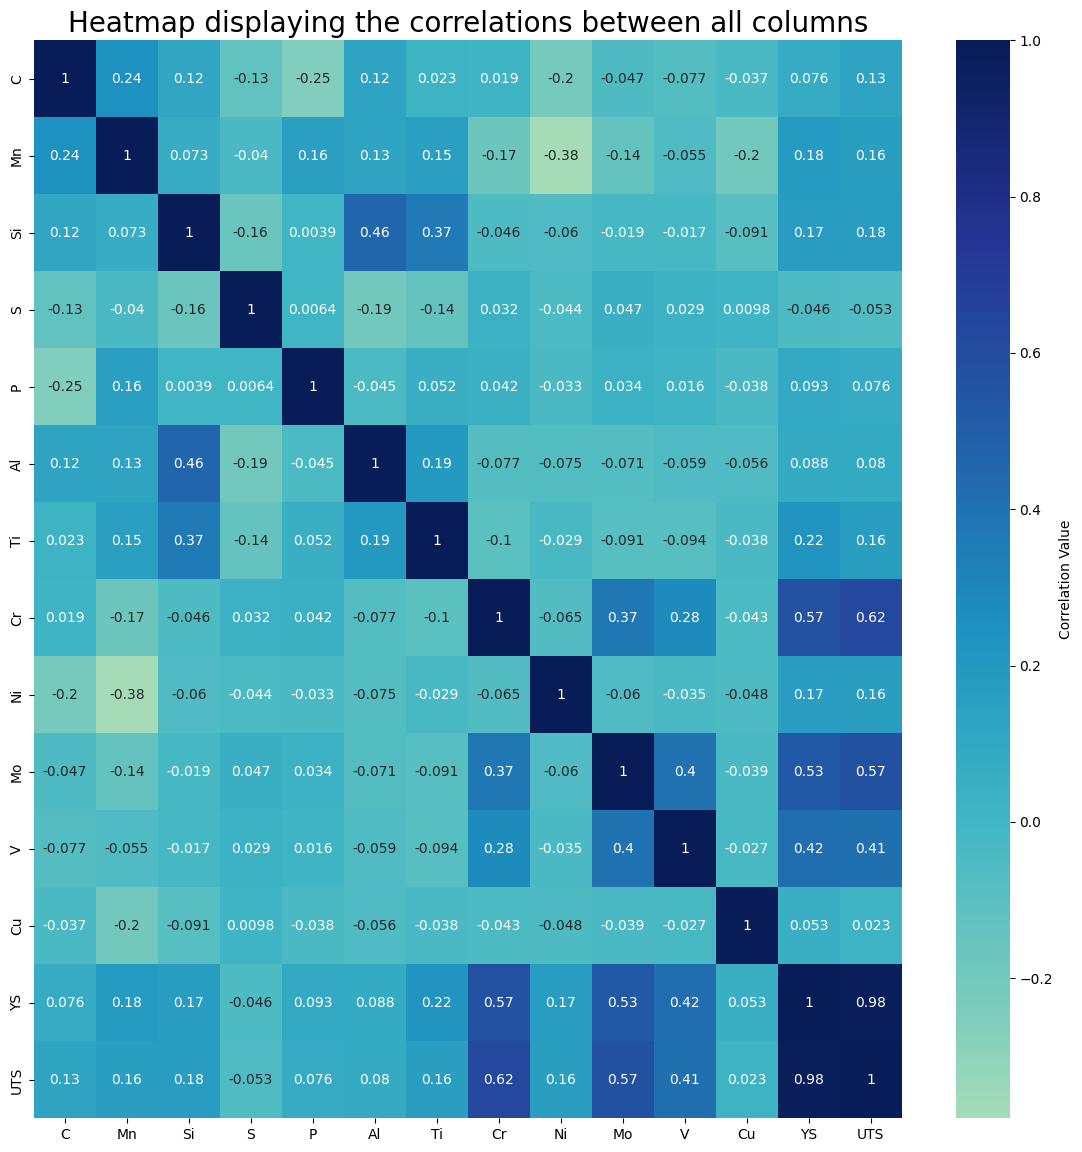

In [4]:
Numdata = YSdata[['C','Mn','Si','S','P','Al','Ti','Cr','Ni','Mo','V','Cu','YS','UTS']]
corr = Numdata.corr()
plt.figure(figsize=(14,14))
plt.title("Heatmap displaying the correlations between all columns", fontsize=20)
sns.heatmap(corr, center=0, annot=True, cmap="YlGnBu", cbar_kws={'label': 'Correlation Value'})
plt.show()

There is some correlation between elements and properties like Cr/Mo content increases yield/ultimate strength while S content decreases strength

Put elements in X variable

In [5]:
X = Numdata.iloc[:,:12].values
X

array([[0.062, 0.62 , 0.29 , ..., 0.005, 0.005, 0.03 ],
       [0.057, 0.65 , 0.3  , ..., 0.005, 0.005, 0.03 ],
       [0.059, 0.63 , 0.31 , ..., 0.005, 0.005, 0.03 ],
       ...,
       [0.076, 1.48 , 0.31 , ..., 0.005, 0.006, 0.04 ],
       [0.077, 1.43 , 0.26 , ..., 0.005, 0.007, 0.04 ],
       [0.076, 1.39 , 0.26 , ..., 0.005, 0.006, 0.04 ]])

put yield stress values in y variable

In [6]:
y = Numdata['YS'].values

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y , random_state=1, test_size=0.20)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(770, 12)
(193, 12)
(770,)
(193,)


In [8]:
# feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [9]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

model = LinearRegression().fit(X_train, y_train)
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
print('r2 score : {}'.format(r2))

r2 score : 0.867950267675643


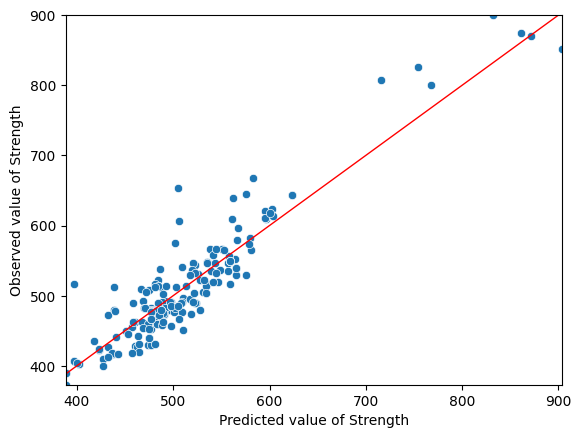

In [12]:
Y_max = y_test.max()
Y_min = y_test.min()
X_max = y_pred.max()
X_min = y_pred.min()

ax = sns.scatterplot(x=y_pred, y=y_test)
ax.set(ylim=(Y_min, Y_max))
ax.set(xlim=(X_min, X_max))
ax.set_xlabel("Predicted value of Strength")
ax.set_ylabel("Observed value of Strength")

X_ref = Y_ref = np.linspace(Y_min, Y_max, 100)
plt.plot(X_ref, Y_ref, color='red', linewidth=1)
plt.show()

C:\Users\ajitp\miniconda3\envs\project\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: ylabel='Count'>

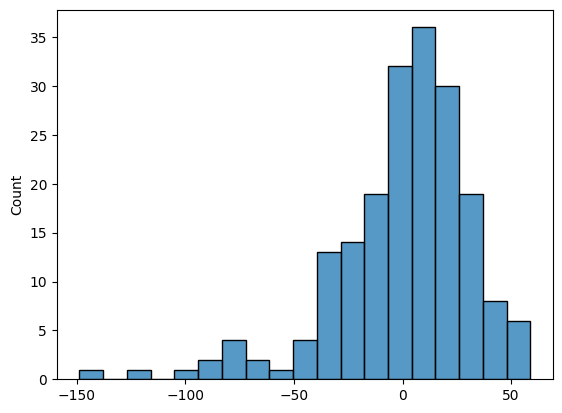

In [11]:
residuals = y_pred-y_test
sns.histplot(residuals)

In [11]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor().fit(X_train,y_train)
y_pred= model.predict(X_test)
r2 = r2_score(y_test, y_pred)
print('r2 score: {}'.format(r2))

r2 score: 0.9074381718260639


Identify max % composition of alloys

In [12]:
X.max(axis=0)

array([0.152, 2.1  , 1.11 , 0.046, 0.04 , 0.068, 0.077, 3.5  , 5.48 ,
       1.16 , 2.873, 2.04 ])

In [13]:
X.min(axis=0)

array([3.5e-02, 2.3e-01, 0.0e+00, 3.0e-03, 3.0e-03, 1.0e-04, 1.0e-04,
       3.0e-02, 3.0e-02, 5.0e-03, 3.0e-03, 2.0e-02])

Create search space based on % compositions present in original data

In [14]:
#3 compositions for each element

element_ranges ={
    "C"  : np.linspace(0.03,0.2,3),
    "Mn"   : np.linspace(0.2,2.5,3),
    "Si"  : np.linspace(0,1.5,3),
    "S"  : np.linspace(0.003,0.1,3),
    "P"   : np.linspace(0.003,0.1,3),
    "Al"  : np.linspace(0.001,0.1,3),
    "Ti"  : np.linspace(0.001,0.15,3),
    "Cr"  : np.linspace(0.03,4,3),
    "Ni"  : np.linspace(0.03,6,3),
    "Mo"  : np.linspace(0.05,1.5,3),
    "V"  : np.linspace(0.03,3,3),
    "Cu"  : np.linspace(0.02,2.5,3),
}

elements = ['C','Mn','Si','S','P','Al','Ti','Cr','Ni','Mo','V','Cu']
element_ranges

{'C': array([0.03 , 0.115, 0.2  ]),
 'Mn': array([0.2 , 1.35, 2.5 ]),
 'Si': array([0.  , 0.75, 1.5 ]),
 'S': array([0.003 , 0.0515, 0.1   ]),
 'P': array([0.003 , 0.0515, 0.1   ]),
 'Al': array([0.001 , 0.0505, 0.1   ]),
 'Ti': array([0.001 , 0.0755, 0.15  ]),
 'Cr': array([0.03 , 2.015, 4.   ]),
 'Ni': array([0.03 , 3.015, 6.   ]),
 'Mo': array([0.05 , 0.775, 1.5  ]),
 'V': array([0.03 , 1.515, 3.   ]),
 'Cu': array([0.02, 1.26, 2.5 ])}

Create search space dataframe where 3 elements have higher values in each row

In [36]:
from itertools import combinations

def get_compositions(elements,element_ranges_dict,comb):
    #df=[elements]
    df=[]
    for elements_sel in combinations(elements,comb):
        i = 1
        while i<3:
            row=[]
            for elem in elements:
                if elem in elements_sel:
                    x = element_ranges_dict[elem]
                    row.append(np.round(x[i],4)) #round to 3 decimal places
                else:
                    row.append(x[0])
            i+=1
            df.append(row)
    DataF = pd.DataFrame(df,columns=elements)
    #DataF = pd.DataFrame(df)
    return(DataF)
                
            

search_space = get_compositions(elements, element_ranges, comb=3)
search_space

,C,Mn,Si,S,P,Al,Ti,Cr,Ni,Mo,V,Cu
0,0.115,1.35,0.75,0.0000,0.0000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
1,0.200,2.50,1.50,0.0000,0.0000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
2,0.115,1.35,0.20,0.0515,0.0030,0.003,0.003,0.003,0.003,0.003,0.003,0.003
3,0.200,2.50,0.20,0.1000,0.0030,0.003,0.003,0.003,0.003,0.003,0.003,0.003
4,0.115,1.35,0.20,0.2000,0.0515,0.003,0.003,0.003,0.003,0.003,0.003,0.003
...,...,...,...,...,...,...,...,...,...,...,...,...
435,0.020,0.02,0.02,0.0200,0.0200,0.020,0.020,0.020,6.000,1.500,0.050,2.500
436,0.020,0.02,0.02,0.0200,0.0200,0.020,0.020,0.020,3.015,0.030,1.515,1.260
437,0.020,0.02,0.02,0.0200,0.0200,0.020,0.020,0.020,6.000,0.030,3.000,2.500
438,0.020,0.02,0.02,0.0200,0.0200,0.020,0.020,0.020,0.020,0.775,1.515,1.260


In [37]:
X_pred = search_space
y_pred= model.predict(X_pred)
df_pred = pd.DataFrame(y_pred)
df_pred.max(axis=0)

C:\Users\ajitp\miniconda3\envs\project\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


0    963.172134
dtype: float64

In [38]:
#df_pred
df_pred[0].idxmax()

181

In [39]:
search_space.iloc[[181]]
#Best_comp=pd.DataFrame(df,columns=elements)
#Best_comp

,C,Mn,Si,S,P,Al,Ti,Cr,Ni,Mo,V,Cu
181,0.03,2.5,0.2,0.2,0.2,0.2,0.2,4.0,6.0,0.03,0.03,0.03


In [18]:
Numdata['YS'].max()

1026